#### Pre requisites

We will install refinery which will also install unity-vision and refinery-tools for all operations

refinery
   ├── unity-vision
   ├── refinery-tools



In [ ]:
!pip install pysolotools>=0.3.5 --index-url=https://artifactory.prd.it.unity.com/artifactory/api/pypi/pypi/simple

In [8]:
import tarfile
import matplotlib.pyplot as plt
import seaborn as sns
from pysolotools.clients import UCVDClient
from pysolotools.consumers import Solo

In [17]:
client = UCVDClient(
    project_id="3e3b0fb5-50fe-4802-a9eb-db81bae8d185",
    org_id="1374969834147",
    sa_key="---",
    api_secret="---"
)

dest_dir="solo_dir"
dataset_id="89493391-6fd9-4a29-bdc7-3d206edf90d3"
archive_name="solo_1k.tar"

Skip this step if you've already downloaded the dataset.

In [16]:

archives = client.list_dataset_archives(dataset_id)
client.download_dataset_archives(dataset_id=dataset_id, dest_dir="solo_dir", skip_on_error=False)


Extract the archives

In [18]:
# TODO: Add API to extract and inflate all archives to one dataset at solo/
fName = f"{dest_dir}/{archive_name}"

with tarfile.open(fName) as st:
    st.extractall(dest_dir)

Initialize Solo Dataset

In [20]:
solo = Solo(f"{dest_dir}/solo")

### Print frames

In [ ]:
for frame in solo.frames():
    annotations, metrics = [cap.annotations for cap in frame.captures], frame.metrics
    print(annotations, metrics)

## Dataset Stats

In [22]:
print("Dataset Metadata !! ")
# print(solo.get_metadata())
stats = solo.stats
print(f"Unity Version: {stats.metadata.unityVersion}")
print(f"Total frames in the dataset: {stats.metadata.totalFrames}")

Dataset Metadata !! 
Unity Version: 2020.3.34f1
Total frames in the dataset: 1000


#### Categories

In [23]:
stats.get_categories()

{1: 'Crate', 2: 'Cube', 3: 'Box', 4: 'Terrain', 5: 'Character'}

### Number of bounding box

In [ ]:
num_bbox = stats.get_num_bbox()
print(f"Total number of bouding boxes: {num_bbox}")

#### Number of bounding box by category

In [24]:
cat_id = 1
num_bbox = stats.get_num_bbox(cat_ids=[cat_id])
print(f"Total number of bounding boxes of category [{cat_id}]: {num_bbox}")

DONE (t=0.00001s)
Total number of bouding boxes of category [1]: 2000


In [25]:
cat_id = 5
num_bbox = stats.get_num_bbox(cat_ids=[cat_id])
print(f"Total number of bouding boxes of category [{cat_id}]: {num_bbox}")

DONE (t=0.00000s)
Total number of bouding boxes of category [5]: 1000


### BBox per Image Distribution

In [26]:
bbox_dist = stats.get_bbox_per_img_dist()
bbox_dist

DONE (t=0.00000s)


{3: 1000}

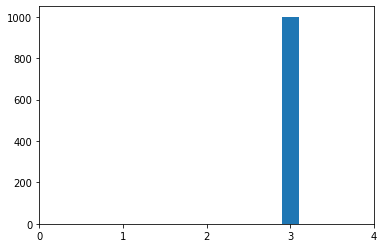

In [29]:
x, y = bbox_dist.keys(), bbox_dist.values()
fig, ax = plt.subplots(1, 1)
ax.bar(x, y, width=0.2)
ax.set_xlim(1, 4)
plt.xticks([0,1,2,3,4])
plt.show()

### BBox Heatmap

In [30]:
bbox_hm = stats.get_bbox_heatmap()

DONE (t=0.00001s)


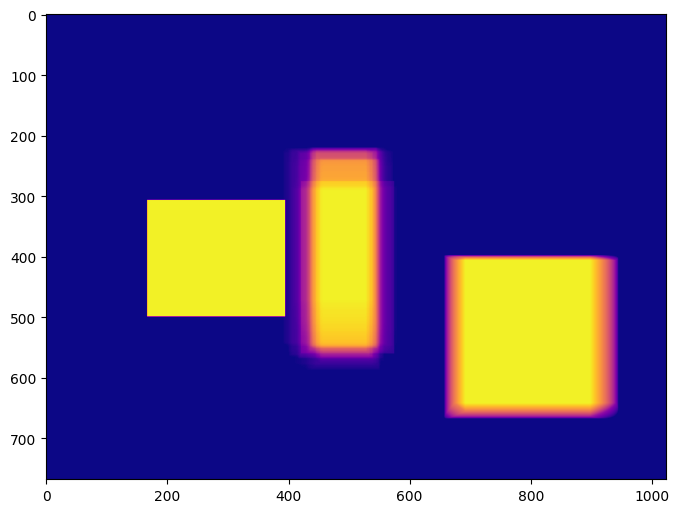

In [31]:
bbox_heatmap_norm = bbox_hm / bbox_hm.max()
fig, ax = plt.subplots(dpi=100, figsize=(8,8))
pcm = ax.imshow(bbox_heatmap_norm[:,:,0], cmap="plasma", )
plt.show()

### Heatmap by category

In [32]:
bbox_hm = stats.get_bbox_heatmap(cat_ids=[5])

DONE (t=0.00000s)


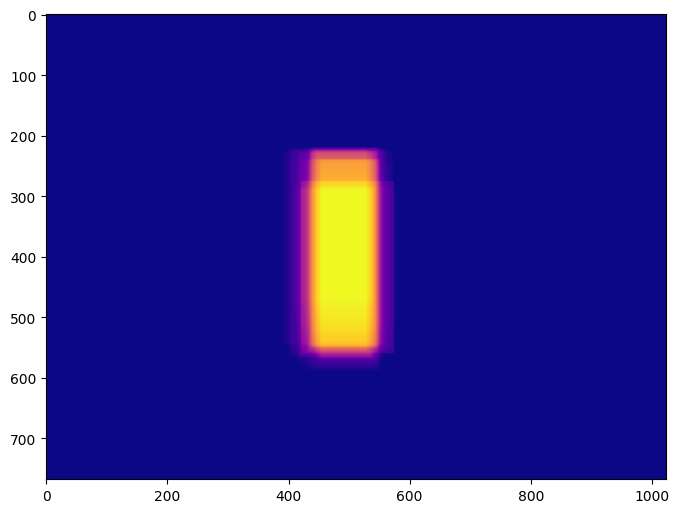

In [33]:
bbox_heatmap_norm = bbox_hm / bbox_hm.max()
fig, ax = plt.subplots(dpi=100, figsize=(8,8))
pcm = ax.imshow(bbox_heatmap_norm[:,:,0], cmap="plasma", )
plt.show()

### BBox Size Distribution

In [34]:
size_dist = stats.get_bbox_size_dist()

DONE (t=0.00000s)


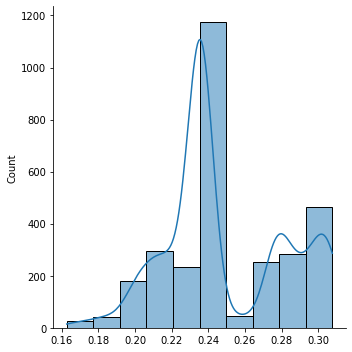

In [35]:
sns.displot(size_dist, bins=10, kde=True)


### BBox Size distribution by category

In [36]:
size_dist = stats.get_bbox_size_dist(cat_ids=[5])

DONE (t=0.00001s)


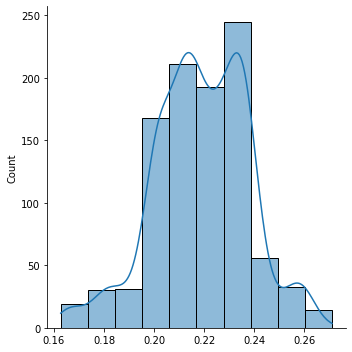

In [37]:
sns.displot(size_dist, bins=10, kde=True)

## Refinery

In [ ]:
!refinery local ./pipeline.yml